# Visualizing the dataset 

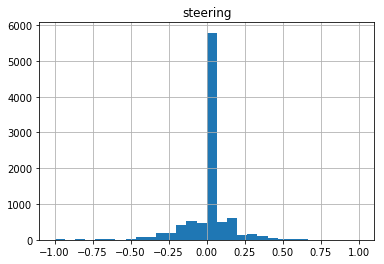

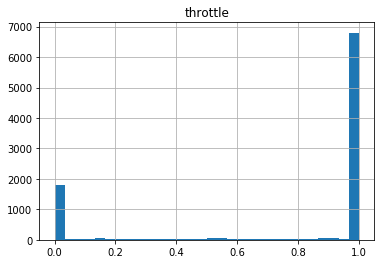

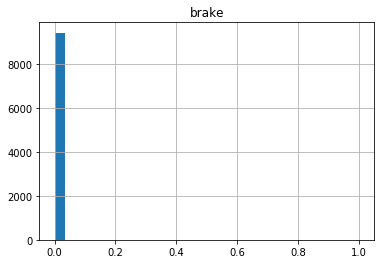

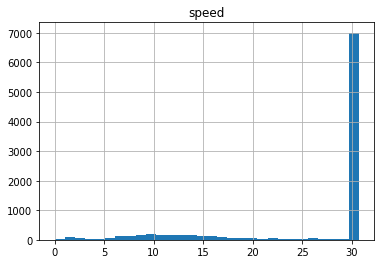

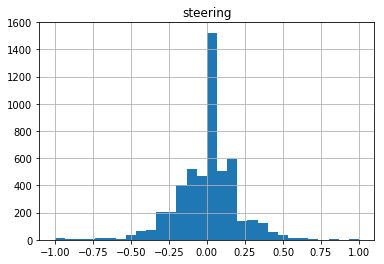

In [57]:
import random
import pandas as pd
% matplotlib inline

FILE = "driving_log.csv"

data = pd.read_csv("./training_udacity/"+FILE)
data.columns = ['center','left','right','steering','throttle','brake','speed']

data.hist(column=["steering"], bins=30)

data.hist(column=["throttle"], bins=30)
data.hist(column=["brake"], bins=30)
data.hist(column=["speed"], bins=30)

data["include"] = 4

def myfilter(row):
    r = random.randint(0,4)
    if row["steering"] == 0:
        row["include"] = r 
        
    return row

data_p = data.apply(myfilter, axis=1)

# zero_steer = data[data["steering"]==0]
unbiased = data_p[data_p["include"] >= 4]
unbiased.hist(column=["steering"], bins=30)

unbiased = unbiased.drop("include", axis=1)
unbiased.to_csv("./training_udacity/unbiased_"+FILE,index=False, header=False )